FFR 120  
Felix Waldschock

HW 2  
Exercise 7.2

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [69]:
# parameters
L = 100         # length of the box
sigma = 1       
dT = 0.01
x0 = 0

In [70]:
# update rule
def updatePos(x):
    o = np.random.randn()*np.sqrt(dT)
    x += o
    return x

Boundary conditions:    
if (x < (- L / 2)):  
    x = - L - x  
elif ((-L / 2) <= x <= (L / 2)):  
    x = x  
elif (x > (L / 2)):   
    x = L - x  


In [71]:
# check boundary conditions
def checkBoundary(x, L):
    Lh = L / 2
    if (x < -Lh):
        x = - L - x
    elif ((-Lh <= x) and (x <= Lh)):
        x = x
    elif (x > Lh):
        x = L - x
    return x
    

In [72]:
# Simulate
N = 10000                                   # number of trajectiories (particles)
T_tot = [10, 100, 1000, 10000, 10000]      # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 
max_steps = int(np.max(Iteration_Steps))    # maximum number of steps

trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
sigmas = np.zeros(N)

# Store the time series trajectory in a tensor
trajectoryTensor = np.zeros((N, max_steps))


In [73]:
# improved version with using vectorizing of numpy
def simulate_trajectory(N, max_steps, L):
    x = np.zeros(N)*x0
    trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
    sigmas_ = np.zeros(N)         # array to store sigmas
    for s in trange(max_steps):
        # calc new sigma
        o = sigma * np.sqrt(dT)
        directions = np.random.choice([-1, 1], N)
        x += directions * o
        
        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)
        
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

        # store the trajectory in a tensor
        #trajectoryTensor[:, s] = x

    trajectories[:, -1] = x
    sigmas_[:] = sigma

    return trajectories, sigmas_

trajectories, sigmas_ = simulate_trajectory(N, max_steps, L)


  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [02:08<00:00, 7809.36it/s]


In [74]:
# save the trajectories to a file
if(1):
    np.save('Simulated_Data/trajectories_72.npy', trajectories)
    np.save('Simulated_Data/sigmas_72.npy', sigmas_)
    #np.save('Simulated_Data/trajectoryTensor_72.npy', trajectoryTensor)


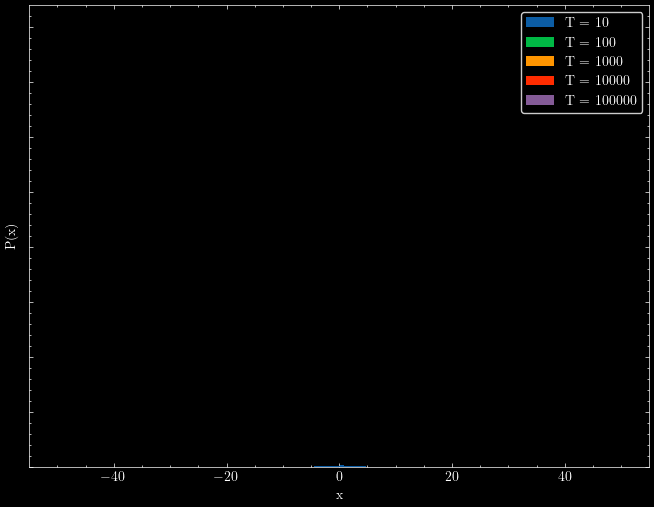

In [75]:
# load the trajectories from a file
trajectories = np.load('Simulated_Data/trajectories_72.npy')
bins = 40
# plot the trajectories in one histogram
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(trajectories[:, 0], bins=bins, density=True, label='T = 10')
plt.hist(trajectories[:, 1], bins=bins, density=True, label='T = 100')
plt.hist(trajectories[:, 2], bins=bins, density=True, label='T = 1000')
plt.hist(trajectories[:, 3], bins=bins, density=True, label='T = 10000')
plt.hist(trajectories[:, 4], bins=100, density=True, label='T = 100000')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
ax.set_yticklabels([])
plt.show()


